# <span style="color:red"> Numerical Simulation 06 </span>

## Exercise 06.1

The aim of this exercise was to resolve the one-dimensional (1D) Ising Model for a system of N spins with nearest neighbors interaction decribed by the following Hamiltonian ($\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$. In this case I used $N=50$ spins with $J=1$.

To have informations about the system I had to compute the following quantities:
1. **Internal energy:** $U(N,T) = \langle H \rangle_{h=0}$
2. **Heat capacity:** $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. **Magnetic susceptibility:** $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. **Magnetization:** $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ and then comparing the results with the exact values computed with the empirical formula for each quantity (the calculation of the exact values are implemented in the Pyton codes). I've sampled $16$ points in the range of temperatures, using a $\delta T=0.1$. Each point was obtained using the data-blocking method ($N=20$) on a simulation with $M=200000$ Monte Carlo steps. Fore each temperature I've runned an equilibration of $500$ steps, before taking the measures, but I've done it in the same code, so I haven't used the feature of restarting the code from a previous configuration (even if I've implemented this option).

The Monte Carlo step was made in two different ways:
- **Metropolis sampling algorithm:** the step consisted in trying to flip one time all the spins of the system, chosen randomly, and accepting the flip if the energy of the new flipped spin was fewer of the previous, or with a probability $A(new|old) = \exp(-\beta (H_{new}-H_{old}))$. So the move can be accepted or not.
- **Gibbs sampling algorithm:** here the move is always accepted. Indeed once I have selected a spin, regardless of the value it had before, I compute the energy for this spin to be up or down, and the relative probability $p_{\pm}=\frac{1}{1+\exp(-\beta (H_{\mp}-H_{\pm}))}$. Once I have this two bins of probability (whose sum is 1) it's easy to randomly generate a number in $[0,1]$ and depending on in which bin it is I set the sin up or down. A Monte Carlo step is when I've done this thing on all the spins in my configuration (randomly chosen, so maybe I don't check them all, but it's the same).



**Results**

The results I've obtained are all in good agreement with the theorical values. Indeed, as you can see from the following plots, the points are all compatible with the exact curve. We can also see that at lower temperature there is more discrepance, even if they are still compatible, and that Gibbs algorithm produce less precise results. I've tried changong the seed, to see if the values where stil compatible, and they are. Obviously they move a little bit, up or down, but still in the range of their uncertainties. For heat capacity I've added some points in region from $T=0.5$ to $T=0.75$, because it is where the curve changes the most, and I wanted a better sampling.

**Internal energy**

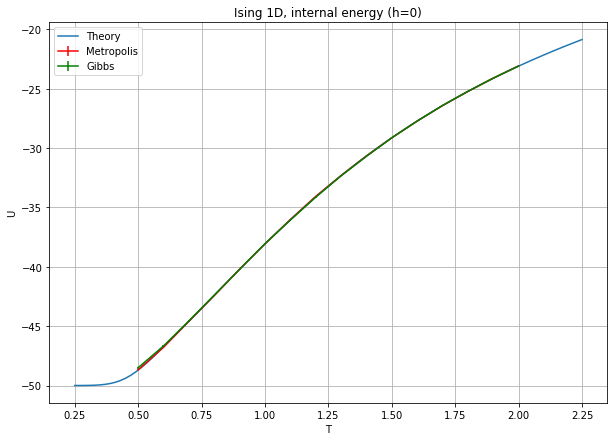

In [4]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.25,2.25,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

t, ave, err=np.loadtxt("metropolis.ene", unpack=True)

fig=plt.figure(figsize=(10,7))
plt.plot(T, e*Ns, label="Theory")
plt.errorbar(t, ave, yerr=err,color="red", label="Metropolis")

t, ave, err=np.loadtxt("gibbs.ene", unpack=True)
plt.errorbar(t, ave, yerr=err,color="green", label="Gibbs")

plt.title('Ising 1D, internal energy (h=0)')
plt.xlabel('T')
plt.ylabel('U')
plt.legend()
plt.grid(True)
plt.show()

**Heat capacity**

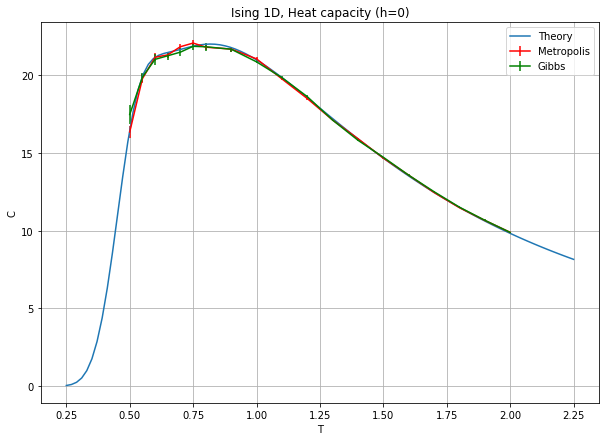

In [5]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

t, ave, err=np.loadtxt("metropolis.heat", unpack=True)
fig=plt.figure(figsize=(10,7))
plt.plot(T, heat*Ns,label="Theory")
plt.errorbar(t, ave, yerr=err,color="red", label="Metropolis")

t, ave, err=np.loadtxt("gibbs.heat", unpack=True)
plt.errorbar(t, ave, yerr=err,color="green", label="Gibbs")

plt.title('Ising 1D, Heat capacity (h=0)')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.grid(True)
plt.show()

**Magnetic susceptibility**

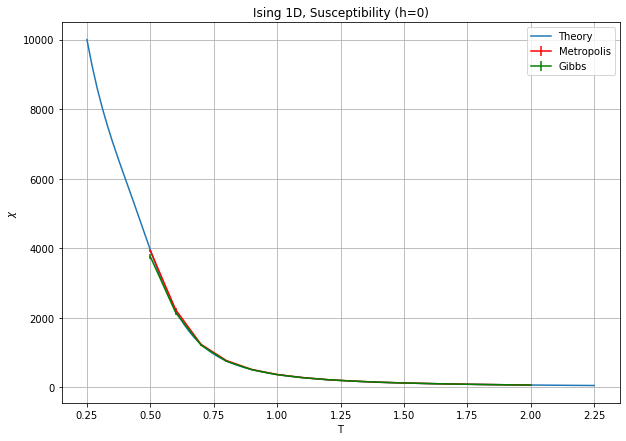

In [8]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

t, ave, err=np.loadtxt("metropolis.chi", unpack=True)
fig=plt.figure(figsize=(10,7))
plt.plot(T, X*Ns,label="Theory")
plt.errorbar(t, ave, yerr=err,color="red", label="Metropolis")
t, ave, err=np.loadtxt("gibbs.chi", unpack=True)
plt.errorbar(t, ave, yerr=err,color="green", label="Gibbs")
plt.title('Ising 1D, Susceptibility (h=0)')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.grid(True)
plt.show()

**Magnetization**

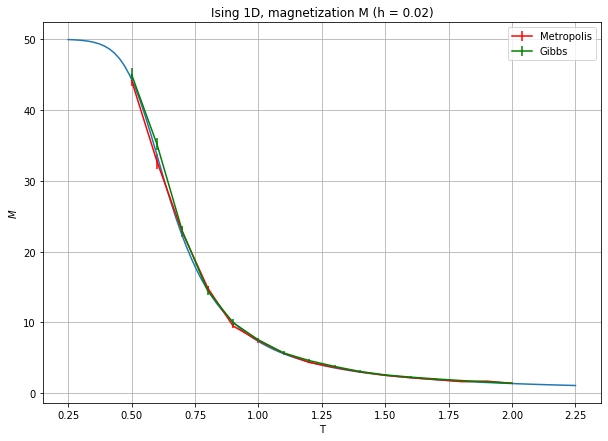

In [9]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

t, ave, err=np.loadtxt("metropolis1.mag", unpack=True)
fig=plt.figure(figsize=(10,7))

plt.plot(T, M*Ns)
plt.errorbar(t, ave, yerr=err,color="red", label="Metropolis")

t, ave, err=np.loadtxt("gibbs1.mag", unpack=True)
plt.errorbar(t, ave, yerr=err,color="green", label="Gibbs")
plt.title('Ising 1D, magnetization M (h = 0.02)')
plt.xlabel('T')
plt.ylabel('$M$')
plt.legend()
plt.grid(True)
plt.show()